In [1]:
import pymc3 as pm

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

### Start SES

In [ ]:
# [] simulate data
# [] model with only a level component
# [] can we get it working with and without a for loop?
    # can try:
        # defining operations outside of the model
        # using theano.scan
        # slicing trick?
    # look at n variables with these different methods. Maybe should be reducing the #

In [275]:
initial_level, smoothing_level = 2000, 0.8

ys = [None for i in range(200)]
ls = [None for i in range(200)]
ls[0] = initial_level

for i in range(1, 200):
    
    noise = np.random.normal(0, 50)
    ys[i] = ls[i-1] + noise
    ls[i] = ls[i-1] + smoothing_level * noise

In [276]:
d = pd.DataFrame({'y': ys, 'level': ls})

d['y_lag-1'] = d.y.shift(-1)

<AxesSubplot:>

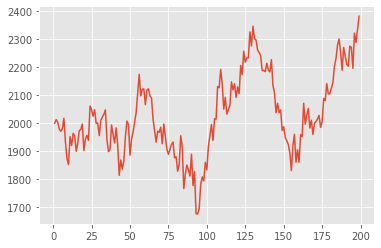

In [277]:
d.y.plot()

In [69]:
d.head()

,y,level,y_lag-1
0,NaN,2000.000000,1915.443112
1,1915.443112,1932.354489,1882.875495
2,1882.875495,1892.771294,2001.936003
3,2001.936003,1980.103061,1867.442481
4,1867.442481,1889.974597,1843.649870


In [68]:
d.tail()

,y,level,y_lag-1
195,1671.687168,1661.272520,1631.472291
196,1631.472291,1637.432337,1662.916616
197,1662.916616,1657.819760,1706.815495
198,1706.815495,1697.016348,1773.315012
199,1773.315012,1758.055279,NaN


In [79]:
d.loc[0:-1, :]

,y,level,y_lag-1


In [83]:
d.iloc[0:-3,:]

,y,level,y_lag-1
0,NaN,2000.000000,1915.443112
1,1915.443112,1932.354489,1882.875495
2,1882.875495,1892.771294,2001.936003
3,2001.936003,1980.103061,1867.442481
4,1867.442481,1889.974597,1843.649870
...,...,...,...
192,1829.172256,1806.286103,1635.702511
193,1635.702511,1669.819229,1607.062600
194,1607.062600,1619.613926,1671.687168
195,1671.687168,1661.272520,1631.472291


In [86]:
d.iloc[:-1,:]

,y,level,y_lag-1
0,NaN,2000.000000,1915.443112
1,1915.443112,1932.354489,1882.875495
2,1882.875495,1892.771294,2001.936003
3,2001.936003,1980.103061,1867.442481
4,1867.442481,1889.974597,1843.649870
...,...,...,...
194,1607.062600,1619.613926,1671.687168
195,1671.687168,1661.272520,1631.472291
196,1631.472291,1637.432337,1662.916616
197,1662.916616,1657.819760,1706.815495


In [ ]:
    # can try to get rid of the loops here (1 below and above)
    # can we do matrix mul/linear alg instead?
        # ie maybe it doesn't matter that we iteratively build up? since it is compiled all at once
    # define outside?
    # use theano.scan?
    # could look at pyro
    # could look at just using torch or scipy and just coding up the model by hand like statsmodels is doing
    
    # look at number of vars
    # maybe the pm.Deterministic is unecessarily adding to the theano nodes / tracked var's

In [75]:
a = [0,1,2,3,4,5]
a

[0, 1, 2, 3, 4, 5]

In [76]:
a[0:len(a)-2]

[0, 1, 2, 3]

In [77]:
a[0:-1]

[0, 1, 2, 3, 4]

In [94]:
import theano.tensor as tt

In [96]:
type(tt.as_list(a))

list

In [98]:
type(y_hats)

numpy.ndarray

In [103]:
x=tt.as_tensor_variable(levels)

In [104]:
x.get_test_value()

array([1.e+04, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
      

In [113]:
levels[:3]

[initial_level ~ Uniform,
 Elemwise{add,no_inplace}.0,
 Elemwise{add,no_inplace}.0]

In [109]:
pm.math.floatX(np.array(levels))

ValueError: setting an array element with a sequence.

In [112]:
np.array(levels[:3])

array([initial_level ~ Uniform, Elemwise{add,no_inplace}.0,
       Elemwise{add,no_inplace}.0], dtype=object)

In [115]:
initial_level

initial_level ~ Uniform

In [119]:
levels[0] = initial_level

ValueError: setting an array element with a sequence.

In [118]:
levels[:4]

array([2., 1., 1., 1.])

In [125]:
d_short = d.loc[:55, :]

In [126]:
with pm.Model() as ses_model:
    initial_level = pm.Uniform(f'initial_level', lower=0, upper=20000)
    smoothing_level = pm.Uniform('smoothing_level', lower=0, upper=1)
    
    # move this out? or use scan? does this create unnecessary var's?
    levels = [1.0 for i in range(len(d_short))]
    levels[0] = initial_level
    
    # move this out? or use scan? does this create unnecessary var's?
    for i in range(1, len(d_short)):
#         levels[i] = pm.Deterministic(f'level_{i}',smoothing_level*(d_short.loc[i]['y']) \
#                                      + (1 - smoothing_level)*(levels[i-1]))
        levels[i] = smoothing_level*(d_short.loc[i]['y']) + (1 - smoothing_level)*(levels[i-1])

    # Y(t+1) = L(t)
#     y_hats = np.array(levels[:-1])
#     y_hats = tt.as_tensor_variable(levels[:-1])
    y_hats = pm.math.stack([levels[:-1]])
#     y_hats = levels[:-1]
    
#     levels_and_slopes = pm.math.stack([levels[:-1], slopes[:-1]])
#     levels_plus_slopes = levels_and_slopes.sum(axis=0)
#     levels_slopes_seasons = pm.math.stack([levels_plus_slopes, seasons[:-1]])
#     y_hats = levels_slopes_seasons.prod(axis=0)
    
    sigma = pm.Uniform('sigma', lower=0, upper=400)
    y_like = pm.Normal('y_like', mu=y_hats, sigma=sigma, observed=d_short.iloc[:-1, :]['y_lag-1'])

In [167]:
import theano

In [174]:
ys = [0,1,2,3]
smoothing_l = 0.8
initial_l = 1
ls = [initial_l, 1.0, 1.0, 1.0]

for i in range(1, len(ys)):
    ls[i] = smoothing_l*ys[i] + (1 - smoothing_l)*ls[i-1]

In [175]:
ls

[1, 1.0, 1.8, 2.7600000000000002]

In [ ]:
def calc_lvl(y, prior_level, )

In [ ]:
tt.float64_atol

pm.math.floatX

In [181]:
# repro ^ with theano
# sounds like the inputs should be theano var's. Maybe they can take lists or np.arrays and convert?

outputs, updates = theano.scan(fn = lambda y, prior_level: smoothing_l * y + (1 - smoothing_l) * prior_level,
           sequences = [
               np.array(ys[1:])
           ], # first arg should be ys[t]
           outputs_info = [
               dict(initial = pm.math.floatX(ls[0]), taps=None)
           ], # taps = None is equivalent to taps=[-1]
#            non_sequences = 
           )

WARNING (theano.scan.basic): Output None (index 0) has a initial state but taps is explicitly set to None 


In [183]:
outputs.get_test_value()

array([1.  , 1.8 , 2.76])

In [296]:
with pm.Model() as ses_model:
#     initial_level = pm.Uniform(f'initial_level', lower=0, upper=20000, shape=(1,1))
    initial_level = pm.Uniform(f'initial_level', lower=0, upper=20000)
    smoothing_level = pm.Uniform('smoothing_level', lower=0, upper=1)
    
    # move this out? or use scan? does this create unnecessary var's?
#     levels = [1.0 for i in range(len(d))]
#     levels[0] = initial_level
    
    # move this out? or use scan? does this create unnecessary var's?
#     for i in range(1, len(d)):
# #         levels[i] = pm.Deterministic(f'level_{i}',smoothing_level*(d.loc[i]['y']) \
# #                                      + (1 - smoothing_level)*(levels[i-1]))
#         levels[i] = smoothing_level*(d.loc[i]['y']) + (1 - smoothing_level)*(levels[i-1])

    ys = d['y']
    
    levels, updates = theano.scan(fn = lambda y, prior_level: smoothing_level * y + (1 - smoothing_level) * prior_level,
           sequences = [
               np.array(ys[1:])
           ], # first arg should be ys[t]
           outputs_info = [
#                dict(initial = pm.math.floatX(ls[0]), taps=None)
               dict(initial = initial_level, taps=None)
           ], # taps = None is equivalent to taps=[-1]
#            non_sequences = 
           )

    # Y(t+1) = L(t)
#     y_hats = np.array(levels[:-1])
#     y_hats = tt.as_tensor_variable(levels[:-1])
    y_hats = pm.math.concatenate([initial_level.reshape(1,1), levels[:-1]])
#     y_hats = levels[:-1]
    
#     levels_and_slopes = pm.math.stack([levels[:-1], slopes[:-1]])
#     levels_plus_slopes = levels_and_slopes.sum(axis=0)
#     levels_slopes_seasons = pm.math.stack([levels_plus_slopes, seasons[:-1]])
#     y_hats = levels_slopes_seasons.prod(axis=0)
    
    sigma = pm.Uniform('sigma', lower=0, upper=400)
    y_like = pm.Normal('y_like', mu=y_hats, sigma=sigma, observed=d.iloc[:-1, :]['y_lag-1'])

WARNING (theano.scan.basic): Output initial_level (index 0) has a initial state but taps is explicitly set to None 


In [297]:
with ses_model:
#     ses_trace = pm.sample(draws=2000, tune=2000, target_accept=0.95)
#     ses_trace = pm.sample(draws=16000)
    ses_trace = pm.sample()

<ipython-input-297-61fa207d68dc>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  ses_trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, smoothing_level, initial_level]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


In [ ]:
# shouldn't it stay in the closer to 0.8 range since the data fit is better with that?
    # maybe i haven't implemented the model correctly, since this isnt happening?
    # aha, there was a bug :D

<ipython-input-298-72d66f4cf359>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(ses_trace)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'initial_level'}>,
        <AxesSubplot:title={'center':'initial_level'}>],
       [<AxesSubplot:title={'center':'smoothing_level'}>,
        <AxesSubplot:title={'center':'smoothing_level'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

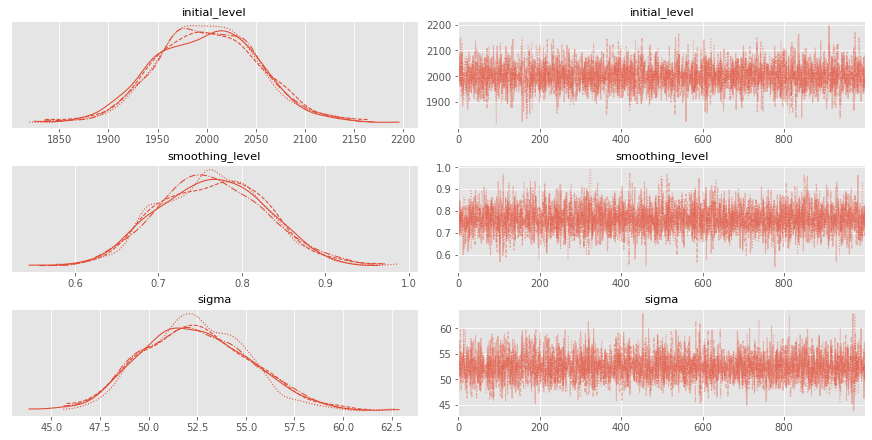

In [298]:
pm.traceplot(ses_trace)

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

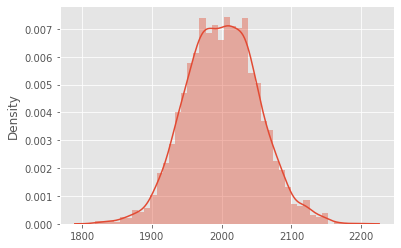

In [299]:
sns.distplot(ses_trace['initial_level'])

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

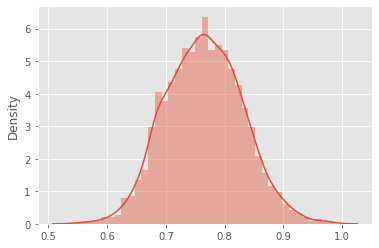

In [300]:
sns.distplot(ses_trace['smoothing_level'])

In [301]:
# hmm, interesting that the smoothing level seems to not have narrowed in on the actual at all
# still fits relatively well so maybe that's why?
# maybe we need to add more data or less noise?
# sigma and initial level get close to actuals

In [302]:
mean_initial_level = ses_trace['initial_level'].mean()
mean_initial_level

2000.7074606817241

In [303]:
mean_smoothing_level = ses_trace['smoothing_level'].mean()
mean_smoothing_level

0.7649429179525346

In [305]:
mean_sigma = ses_trace['sigma'].mean()
mean_sigma

52.45097526757168

In [306]:
d.loc[0, 'level_hat'] = mean_initial_level

In [307]:
d.head(6)

,y,level,y_lag-1,level_hat
0,NaN,2000.000000,1998.820056,2000.707461
1,1998.820056,1999.056045,2012.205226,1999.194818
2,2012.205226,2009.575390,2002.970845,2009.603144
3,2002.970845,2004.291754,1978.642590,2004.297305
4,1978.642590,1983.772423,1969.928962,1983.773533
5,1969.928962,1972.697654,1978.794232,1972.697876


In [308]:
for idx, row in d.iloc[1:,:].iterrows():
#     print('idx', idx)
    
    level_minus_1 = d.loc[idx-1]['level_hat']
    y = row['y']
#     print('level_minus_1', level_minus_1)
#     print('y', y)
    
    d.loc[idx, 'level_hat'] = mean_smoothing_level * y + (1 - mean_smoothing_level) * level_minus_1

<AxesSubplot:>

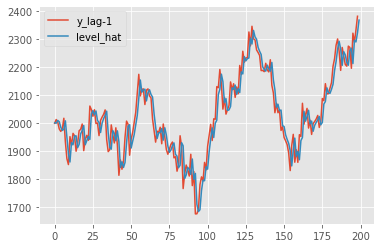

In [309]:
d[['y_lag-1', 'level_hat']].plot()

In [158]:
ses_model.basic_RVs

[initial_level_interval__ ~ TransformedDistribution,
 smoothing_level_interval__ ~ TransformedDistribution,
 sigma_interval__ ~ TransformedDistribution,
 y_like ~ Normal]

In [159]:
ses_model.observed_RVs

[y_like ~ Normal]

In [160]:
ses_model.free_RVs

[initial_level_interval__ ~ TransformedDistribution,
 smoothing_level_interval__ ~ TransformedDistribution,
 sigma_interval__ ~ TransformedDistribution]

In [161]:
ses_model.unobserved_RVs

[initial_level_interval__ ~ TransformedDistribution,
 smoothing_level_interval__ ~ TransformedDistribution,
 sigma_interval__ ~ TransformedDistribution,
 initial_level ~ Uniform,
 smoothing_level ~ Uniform,
 sigma ~ Uniform]

In [162]:
ses_model.deterministics

[initial_level ~ Uniform, smoothing_level ~ Uniform, sigma ~ Uniform]

In [166]:
ses_model.RV_dims

{}

In [122]:
type(y_hats)

theano.tensor.var.TensorVariable

In [123]:
y_hats.get_test_value()

array([[10000.        ,  5957.72155576,  3920.29852542,  2961.11726418,
         2414.27987252,  2128.96487122,  1983.3857787 ,  1990.10355549,
         1959.82906802,  1910.81274196,  1816.23430519,  1809.86984069,
         1791.78636402,  1759.35503361,  1785.12280981,  1811.74323549,
         1789.8097254 ,  1846.94206429,  1794.37168528,  1819.90432696,
         1826.81628881,  1875.24540446,  1850.106601  ,  1815.69315642,
         1743.69591443,  1647.70132499,  1602.95660465,  1508.53734636,
         1519.13191248,  1568.56101311,  1625.30715796,  1704.45685037,
         1766.32729618,  1739.94051351,  1750.31040298,  1734.17323342,
         1703.67882618,  1667.42038811,  1696.32500242,  1702.83746544,
         1764.47109746,  1783.85843539,  1710.80357453,  1679.33329258,
         1712.35988035,  1742.48886923,  1721.27602095,  1750.78766314,
         1792.04945713,  1803.77155485,  1702.94025687,  1707.40555156,
         1731.79392919,  1756.40374037,  1765.55526831,  1820.52

In [ ]:
# seems like pm.math.stack() gets the levels list to be the right data type
# still not clear though why the other ways don't work (ie just using a np.array, seemed like that is something that should be convertible to a theano object, per different discussions online)

In [127]:
with ses_model:
#     hier_trace = pm.sample(draws=2000, tune=2000, target_accept=0.95)
    ses_trace = pm.sample()

<ipython-input-127-c2e50188be3c>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  ses_trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, smoothing_level, initial_level]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


<ipython-input-128-72d66f4cf359>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(ses_trace)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'initial_level'}>,
        <AxesSubplot:title={'center':'initial_level'}>],
       [<AxesSubplot:title={'center':'smoothing_level'}>,
        <AxesSubplot:title={'center':'smoothing_level'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

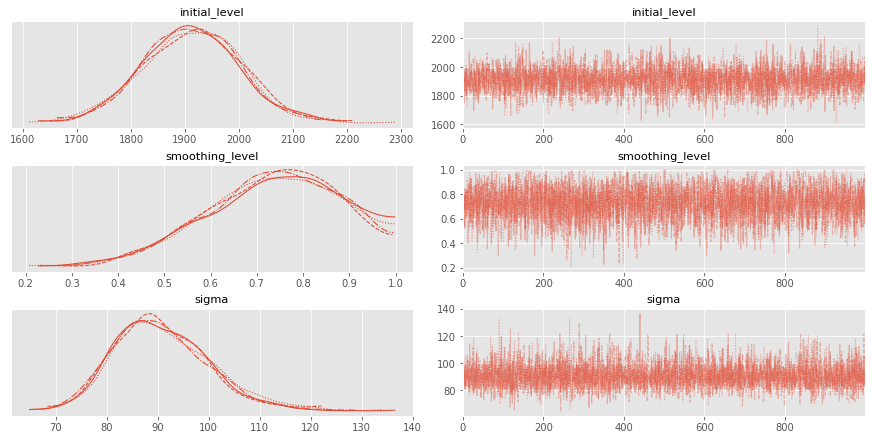

In [128]:
pm.traceplot(ses_trace)

In [131]:
ses_trace.varnames

['initial_level_interval__',
 'smoothing_level_interval__',
 'sigma_interval__',
 'initial_level',
 'smoothing_level',
 'sigma']

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

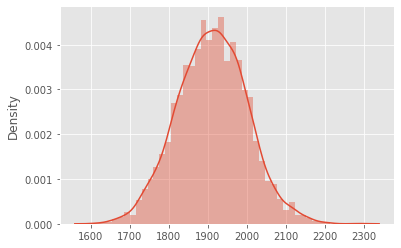

In [134]:
sns.distplot(ses_trace['initial_level'])

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

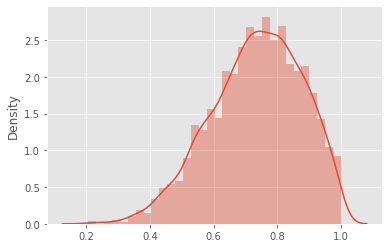

In [144]:
sns.distplot(ses_trace['smoothing_level'])

In [135]:
mean_initial_level = ses_trace['initial_level'].mean()
mean_initial_level

1911.891191656336

In [136]:
mean_smoothing_level = ses_trace['smoothing_level'].mean()
mean_smoothing_level

0.7348712298966243

In [142]:
d_short.loc[0, 'level_hat'] = mean_initial_level

/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [153]:
d_short.head(6)

,y,level,y_lag-1,level_hat
0,NaN,2000.000000,1915.443112,1857.277784
1,1915.443112,1932.354489,1882.875495,1900.021810
2,1882.875495,1892.771294,2001.936003,1887.421476
3,2001.936003,1980.103061,1867.442481,1971.574907
4,1867.442481,1889.974597,1843.649870,1895.050983
5,1843.649870,1852.914815,1837.806686,1857.277784


In [156]:
mean_smoothing_level * 1882.875495 + (1 - mean_smoothing_level) * 1900.021810

1887.421476407755

In [154]:
for idx, row in d_short.iloc[1:,:].iterrows():
#     print('idx', idx)
    
    level_minus_1 = d_short.loc[idx-1]['level_hat']
    y = row['y']
#     print('level_minus_1', level_minus_1)
#     print('y', y)
    
    d_short.loc[idx, 'level_hat'] = mean_smoothing_level * y + (1 - mean_smoothing_level) * level_minus_1

idx 1
level_minus_1 1857.2777839474559
y 1915.4431115185334
idx 2
level_minus_1 1900.0218097569536
y 1882.8754950778682
idx 3
level_minus_1 1887.4214764005396
y 2001.9360029444747
idx 4
level_minus_1 1971.5749073629108
y 1867.4424808655451
idx 5
level_minus_1 1895.050983030672
y 1843.649869925243
idx 6
level_minus_1 1857.2777838248298
y 1837.8066861790585
idx 7
level_minus_1 1842.9690343504446
y 1996.8213322779393
idx 8
level_minus_1 1956.0306617508445
y 1929.554580543889
idx 9
level_minus_1 1936.5741513914463
y 1861.7964158998016
idx 10
level_minus_1 1881.6221449418167
y 1721.65586841297
idx 11
level_minus_1 1764.0675305670798
y 1803.5053762042953
idx 12
level_minus_1 1793.0492686949735
y 1773.7028873374938
idx 13
level_minus_1 1778.8321696327534
y 1726.9237032119202
idx 14
level_minus_1 1740.686131072028
y 1810.8905860021785
idx 15
level_minus_1 1792.2773652107696
y 1838.363661167478
idx 16
level_minus_1 1826.1448582018556
y 1767.8762153180433
idx 17
level_minus_1 1783.3249089414212


/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<AxesSubplot:>

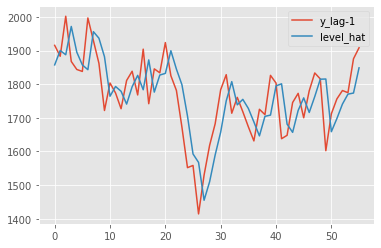

In [157]:
d_short[['y_lag-1', 'level_hat']].plot()

### End SES

No handles with labels found to put in legend.


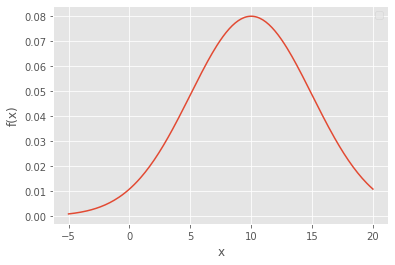

In [213]:
x = np.linspace(-5, 20, 200)
# for b in [0.25, 0.5, 1.0, 2.0]:
# for b in [0.1, 0.2]:
# for b in [2.0]:

pdf = st.norm.pdf(x, loc=10, scale=5)
plt.plot(x, pdf)
# plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

No handles with labels found to put in legend.


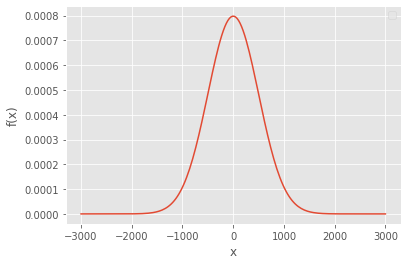

In [294]:
x = np.linspace(-3000, 3000, 200)
# for b in [0.25, 0.5, 1.0, 2.0]:
# for b in [0.1, 0.2]:
# for b in [2.0]:

pdf = st.norm.pdf(x, loc=0, scale=500)
plt.plot(x, pdf)
# plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

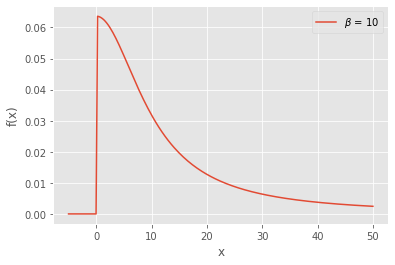

In [222]:
x = np.linspace(-5, 50, 200)
# for b in [0.25, 0.5, 1.0, 2.0]:
# for b in [0.1, 0.2]:
for b in [10]:
    pdf = st.halfcauchy.pdf(x, scale=b)
    plt.plot(x, pdf, label=r'$\beta$ = {}'.format(b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

In [234]:
x = np.linspace(0, 20, 21)

In [235]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

No handles with labels found to put in legend.


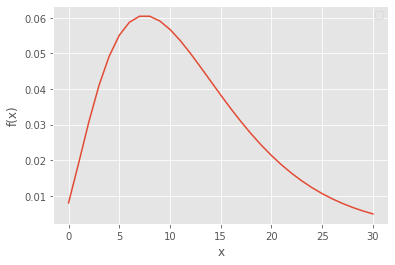

In [243]:
x = np.linspace(0, 30, 31)
n = 3
p = 0.2
pmf = st.nbinom.pmf(x, n, p)
plt.plot(x, pmf)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()

In [ ]:
# [] try incorporating year 2020 unique multipliers
# [] also can allow for some small # of changepoints in the level that happen around covid
    # [] the hope is that including these will make us not learn to overfit to most recent level
# [] see how well the data fits with this
# [] add a dampening parameter
# [] then can make it hierarchical
# [] longer term, could do a zone-embedding or multiple different hierarchical groups kinda approach, since all zones likely aren't from same hierarchical dist 

In [253]:
dfd = pd.read_csv('./weekly_dmd.csv')
dfd.head(2)

,zone_id,date,total_demand_new,total_demand_new_lag1,total_demand_new_lag2,total_demand_new_lag-1,total_demand_new_lag-2,smoothed_total_demand,year,total_demand_new_lag3,...,day,t4w_total_demand_lag2,szn_factor,pred_for_year,estimated_szn_factor,naive_pred,naive_error,naive_abs_error,naive_pct_error,naive_abs_pct_error
0,1,2017-06-12,462.874517,NaN,NaN,1844.63706,2070.638284,NaN,2017,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,641,2017-06-12,0.000000,NaN,NaN,0.00000,0.000000,NaN,2017,NaN,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
df = dfd.loc[dfd.zone_id == 1].reset_index(drop=True).loc[2:,:].reset_index(drop=True)
df.shape

(206, 24)

In [420]:
with pm.Model() as test:
#     seasons = np.array([0 for i in range(len(df))])
    x1 = pm.TruncatedNormal('x1', mu=1.0, sigma=0.3, lower=0, upper=2)
    x2 = pm.Deterministic('x2', x1 + 3)
    xs = [x1, x2]
    
    l1 = pm.TruncatedNormal('l1', mu=1.0, sigma=0.3, lower=0, upper=2)
    l2 = pm.Deterministic('l2', l1 + 3)
    ls = [l1, l2]
    
    s1 = pm.TruncatedNormal('s1', mu=2.0, sigma=0.3, lower=0, upper=2)
    s2 = pm.TruncatedNormal('s2', mu=0.5, sigma=0.3, lower=0, upper=2)
    ss = [s1, s2]
    
    y = pm.math.stack([xs, ls])
    z = y.sum(axis=0)
    fin = pm.math.stack([z, ss])
    finfin = fin.prod(axis=0)
#     z = 
    
#     fin = np.array(xs) * np.array(ls)
#     fin = pm.math.dot(xs, [1,2])
    
    eps = pm.HalfCauchy('eps', beta=1)
    
    y_like = pm.Normal('y_like', mu=finfin, sigma=eps, observed=[1,2])
    

In [421]:
# params to be estimated:
    # initial conditions (L_0, B_0, S_0, ..., S_51, and the weights alpha, beta, gamma)

# when fitting, should we think of it as fitting params such that the components at time t predict y(t+h) well or s.t. they predict y(t) well? can look at what statsmodels does. looks like it's y(t)
    # _holt_win_add_mul_dam

with pm.Model() as hier_model:
    season_length = 52
    m = season_length

    initial_level = pm.Uniform(f'initial_level', lower=0, upper=20000)
    initial_slope = pm.Uniform(f'initial_slope', lower=-1000, upper=1000)
    
    levels = [1.0 for i in range(len(df))]
    slopes = [1.0 for i in range(len(df))]
    seasons = [1.0 for i in range(len(df))]

    # initial seasons
    for i in range(season_length):
        seasons[i] = pm.TruncatedNormal(f's_{i}', mu=1.0, sigma=0.3, lower=0, upper=2)

    levels[0] = initial_level
    slopes[0] = initial_slope



    
#     levels = pm.Uniform(f'levels', lower=0, upper=20000, shape=len(df))
#     slopes = pm.Uniform(f'slopes', lower=-1000, upper=1000, shape=len(df))
#     seasons = pm.TruncatedNormal(f'seasons', mu=1.0, sigma=0.3, lower=0, upper=2, shape=len(df))
    
    
    
    
    # [] check this: level and slope smoothers are constrained b/w 0 and 1. seasons b/w 0 and 1-smoothing_level. dampening_slope constrained b/w .8 and .98 usually
    smoothing_level = pm.Uniform('smoothing_level', lower=0, upper=1)
    smoothing_slope = pm.Uniform('smoothing_slope', lower=0, upper=1)
    smoothing_season = pm.Uniform('smoothing_season', lower=0, upper=1 - smoothing_level)
#     dampening_slope = 
    
    # l_change_2020_t should only be allowed to be non-zero a few times
    # probably also want a b_change_2020_t
    
    
#     n_level_changepoints = pm.NegativeBinomial('n_level_changepoints', n=3, p=0.2)
#     # ideally this is "without replacement"
#     level_changepoints = pm.DiscreteUniform('changepoints', lower=0, upper=season_length - 1, shape=n_level_changepoints)
#     level_changes = [pm.TruncatedNormal(f'level_change_{i}', mu=1.0, sigma=1.0, lower=0, upper=2.5) if i in level_changepoints else pm.Deterministic(f'level_change_{i}', 1.0) for i in range(season_length)]
    

#     for t in range(len(df)):
        # if year == 2020:
            # y_t = (l_t + h*b_t)*s_t_plus_h_min_mk_min_m*s_2020_t_plus_h_min_mk_min_m
            # l_t = (...) * l_change_2020_t
        # else:
            # y_t_plus_h = (l_t + h*b_t)*s_t_plus_h_min_mk_min_m
            # l_t = ...
        
#         L_sub_t = smoothing_level*(Y_sub_t / S_sub_t_min_m) + (1-smoothing_level) * (L_sub_t_min_1 + B_sub_t_min_1)
        
    # initial level, slope are learned so we skip the first record
#     for i, row in df[1:].iterrows():
    for i in range(1, len(df)):
#         if row['year'] == 2020:
            
#         else:
            # something seems up with this part
            # why is it s[i - m] in otexts and not just s[i]?
            # maybe just see if we can fit this simple model w/o the add'l changepoint stuff
            # can also try the state space form ish

#         levels[i] = smoothing_level*(df.loc[i]['total_demand_new'] / seasons[i]) \
#             + (1 - smoothing_level)*(levels[i-1] + slopes[i-1])
        levels[i] = pm.Deterministic(f'level_{i}', smoothing_level*(df.loc[i]['total_demand_new'] / seasons[i]) \
            + (1 - smoothing_level)*(levels[i-1] + slopes[i-1]))

#             levels[i] = smoothing_level*(df[i-1]['total_demand_new'] / seasons[i - 1]) \
#                 + (1 - smoothing_level)*(levels[i-1] + slopes[i-1])

#             levels[i] = smoothing_level*(row['total_demand_new'] / seasons[i - m]) \
#                 + (1 - smoothing_level)*(levels[i-1] + slopes[i-1])

#         slopes[i] = smoothing_slope*(levels[i] - levels[i-1]) \
#             + (1 - smoothing_slope)*slopes[i-1]
        slopes[i] = pm.Deterministic(f'slope_{i}', smoothing_slope*(levels[i] - levels[i-1]) \
            + (1 - smoothing_slope)*slopes[i-1])

#             seasons[i + m - 1] = smoothing_season * df[i+m-1]['total_demand_new'] / (levels[i+m-2] + slopes[i+m-2]) \
#                 + (1 - smoothing_season) * seasons[i - 1]

        if i >= season_length:
#             seasons[i] = smoothing_season * df.loc[i]['total_demand_new'] / (levels[i-1] + slopes[i-1]) \
#                 + (1 - smoothing_season) * seasons[i - m]
            seasons[i] = pm.Deterministic(f'season_{i}', smoothing_season * df.loc[i]['total_demand_new'] / (levels[i-1] + slopes[i-1]) \
                + (1 - smoothing_season) * seasons[i - m])
        
    levels_and_slopes = pm.math.stack([levels[:-1], slopes[:-1]])
    levels_plus_slopes = levels_and_slopes.sum(axis=0)
    levels_slopes_seasons = pm.math.stack([levels_plus_slopes, seasons[:-1]])
    y_hats = levels_slopes_seasons.prod(axis=0)
    
#     ys = (np.array(levels[:-1]) + np.array(slopes[:-1])) * np.array(seasons[:-1])
    
#     ys = pm.Deterministic('ys', (np.array(levels[:-1]) + np.array(slopes[:-1])) * np.array(seasons[:-1]))
    
#     ys = [0 for i in range(len(df) - 1)]
#     for i in range(0,len(df) - 1):
#         ys[i] = (levels[i] + slopes[i]) * seasons[i]

        
#     y_like = pm.Normal('y_like', mu=mu[zone_idx], sigma=sigma[zone_idx], observed=dd.zone_level_holiday_factor)
#     sigma = pm.HalfCauchy('sigma', beta=100)
    sigma = pm.Uniform('sigma', lower=0, upper=400)
#     y_like = pm.Normal('y_like', mu=[1.5 for i in range(205)], sigma=sigma, observed=df.loc[0:len(df)-2, 'total_demand_new_lag-1'])
    y_like = pm.Normal('y_like', mu=y_hats, sigma=sigma, observed=df.loc[0:len(df)-2, 'total_demand_new_lag-1'])
    
    # should prolly be an AR error structure here? so if time t is big +ve error, its pretty likely to see that at time t+1 too 

In [425]:
df_orig = df.copy()

In [426]:
df = df.loc[:55, :]

In [427]:
# params to be estimated:
    # initial conditions (L_0, B_0, S_0, ..., S_51, and the weights alpha, beta, gamma)

# when fitting, should we think of it as fitting params such that the components at time t predict y(t+h) well or s.t. they predict y(t) well? can look at what statsmodels does. looks like it's y(t)
    # _holt_win_add_mul_dam

with pm.Model() as hier_model:
    season_length = 52
    m = season_length

    initial_level = pm.Uniform(f'initial_level', lower=0, upper=20000)
    initial_slope = pm.Uniform(f'initial_slope', lower=-1000, upper=1000)
    
    levels = [1.0 for i in range(len(df))]
    slopes = [1.0 for i in range(len(df))]
    seasons = [1.0 for i in range(len(df))]

    # initial seasons
    for i in range(season_length):
        seasons[i] = pm.TruncatedNormal(f's_{i}', mu=1.0, sigma=0.3, lower=0, upper=2)

    levels[0] = initial_level
    slopes[0] = initial_slope



    
#     levels = pm.Uniform(f'levels', lower=0, upper=20000, shape=len(df))
#     slopes = pm.Uniform(f'slopes', lower=-1000, upper=1000, shape=len(df))
#     seasons = pm.TruncatedNormal(f'seasons', mu=1.0, sigma=0.3, lower=0, upper=2, shape=len(df))
    
    
    
    
    # [] check this: level and slope smoothers are constrained b/w 0 and 1. seasons b/w 0 and 1-smoothing_level. dampening_slope constrained b/w .8 and .98 usually
    smoothing_level = pm.Uniform('smoothing_level', lower=0, upper=1)
    smoothing_slope = pm.Uniform('smoothing_slope', lower=0, upper=1)
    smoothing_season = pm.Uniform('smoothing_season', lower=0, upper=1 - smoothing_level)
#     dampening_slope = 
    
    # l_change_2020_t should only be allowed to be non-zero a few times
    # probably also want a b_change_2020_t
    
    
#     n_level_changepoints = pm.NegativeBinomial('n_level_changepoints', n=3, p=0.2)
#     # ideally this is "without replacement"
#     level_changepoints = pm.DiscreteUniform('changepoints', lower=0, upper=season_length - 1, shape=n_level_changepoints)
#     level_changes = [pm.TruncatedNormal(f'level_change_{i}', mu=1.0, sigma=1.0, lower=0, upper=2.5) if i in level_changepoints else pm.Deterministic(f'level_change_{i}', 1.0) for i in range(season_length)]
    

#     for t in range(len(df)):
        # if year == 2020:
            # y_t = (l_t + h*b_t)*s_t_plus_h_min_mk_min_m*s_2020_t_plus_h_min_mk_min_m
            # l_t = (...) * l_change_2020_t
        # else:
            # y_t_plus_h = (l_t + h*b_t)*s_t_plus_h_min_mk_min_m
            # l_t = ...
        
#         L_sub_t = smoothing_level*(Y_sub_t / S_sub_t_min_m) + (1-smoothing_level) * (L_sub_t_min_1 + B_sub_t_min_1)
        
    # initial level, slope are learned so we skip the first record
#     for i, row in df[1:].iterrows():

    # can try to get rid of the loops here (1 below and above)
    # can we do matrix mul/linear alg instead?
        # ie maybe it doesn't matter that we iteratively build up? since it is compiled all at once
    # define outside?
    # use theano.scan?
    # could look at pyro
    # could look at just using torch or scipy and just coding up the model by hand like statsmodels is doing
    
#     levels = pm.Deterministic('levels', smoothing_level * , shape=len(df) - 1)

    for i in range(1, len(df)):
#         if row['year'] == 2020:
            
#         else:
            # something seems up with this part
            # X why is it s[i - m] in otexts and not just s[i]?
                # ah, it's actually just some algebra/substitution they did (explained in 'additive method' section here https://otexts.com/fpp2/holt-winters.html)
            # maybe just see if we can fit this simple model w/o the add'l changepoint stuff
            # can also try the state space form ish

#         levels[i] = smoothing_level*(df.loc[i]['total_demand_new'] / seasons[i]) \
#             + (1 - smoothing_level)*(levels[i-1] + slopes[i-1])
        levels[i] = pm.Deterministic(f'level_{i}', smoothing_level*(df.loc[i]['total_demand_new'] / seasons[i]) \
            + (1 - smoothing_level)*(levels[i-1] + slopes[i-1]))

#             levels[i] = smoothing_level*(df[i-1]['total_demand_new'] / seasons[i - 1]) \
#                 + (1 - smoothing_level)*(levels[i-1] + slopes[i-1])

#             levels[i] = smoothing_level*(row['total_demand_new'] / seasons[i - m]) \
#                 + (1 - smoothing_level)*(levels[i-1] + slopes[i-1])

#         slopes[i] = smoothing_slope*(levels[i] - levels[i-1]) \
#             + (1 - smoothing_slope)*slopes[i-1]
        slopes[i] = pm.Deterministic(f'slope_{i}', smoothing_slope*(levels[i] - levels[i-1]) \
            + (1 - smoothing_slope)*slopes[i-1])

#             seasons[i + m - 1] = smoothing_season * df[i+m-1]['total_demand_new'] / (levels[i+m-2] + slopes[i+m-2]) \
#                 + (1 - smoothing_season) * seasons[i - 1]

        if i >= season_length:
#             seasons[i] = smoothing_season * df.loc[i]['total_demand_new'] / (levels[i-1] + slopes[i-1]) \
#                 + (1 - smoothing_season) * seasons[i - m]
            seasons[i] = pm.Deterministic(f'season_{i}', smoothing_season * df.loc[i]['total_demand_new'] / (levels[i-1] + slopes[i-1]) \
                + (1 - smoothing_season) * seasons[i - m])
        
    levels_and_slopes = pm.math.stack([levels[:-1], slopes[:-1]])
    levels_plus_slopes = levels_and_slopes.sum(axis=0)
    levels_slopes_seasons = pm.math.stack([levels_plus_slopes, seasons[:-1]])
    y_hats = levels_slopes_seasons.prod(axis=0)
    
#     ys = (np.array(levels[:-1]) + np.array(slopes[:-1])) * np.array(seasons[:-1])
    
#     ys = pm.Deterministic('ys', (np.array(levels[:-1]) + np.array(slopes[:-1])) * np.array(seasons[:-1]))
    
#     ys = [0 for i in range(len(df) - 1)]
#     for i in range(0,len(df) - 1):
#         ys[i] = (levels[i] + slopes[i]) * seasons[i]

        
#     y_like = pm.Normal('y_like', mu=mu[zone_idx], sigma=sigma[zone_idx], observed=dd.zone_level_holiday_factor)
#     sigma = pm.HalfCauchy('sigma', beta=100)
    sigma = pm.Uniform('sigma', lower=0, upper=400)
#     y_like = pm.Normal('y_like', mu=[1.5 for i in range(205)], sigma=sigma, observed=df.loc[0:len(df)-2, 'total_demand_new_lag-1'])
    y_like = pm.Normal('y_like', mu=y_hats, sigma=sigma, observed=df.iloc[:-1, :]['total_demand_new_lag-1'])
    
    # should prolly be an AR error structure here? so if time t is big +ve error, its pretty likely to see that at time t+1 too 

In [428]:
with hier_model:
#     hier_trace = pm.sample(draws=2000, tune=2000, target_accept=0.95)
    hier_trace = pm.sample()

<ipython-input-428-cb4a6d4eb880>:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  hier_trace = pm.sample()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, smoothing_season, smoothing_slope, smoothing_level, s_51, s_50, s_49, s_48, s_47, s_46, s_45, s_44, s_43, s_42, s_41, s_40, s_39, s_38, s_37, s_36, s_35, s_34, s_33, s_32, s_31, s_30, s_29, s_28, s_27, s_26, s_25, s_24, s_23, s_22, s_21, s_20, s_19, s_18, s_17, s_16, s_15, s_14, s_13, s_12, s_11, s_10, s_9, s_8, s_7, s_6, s_5, s_4, s_3, s_2, s_1, s_0, initial_slope, initial_level]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 107 seconds.
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.
There were 132 divergences after tuning. Increase `target_accept` or reparameterize.
There were 87 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


<ipython-input-429-7ab9cfa04b90>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(hier_trace)
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/sorenzeliger/.pyenv/versions/3.9.0/lib/python3.9/site-packages/arviz/plots/traceplot.py:197: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (172), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'initial_level'}>,
        <AxesSubplot:title={'center':'initial_level'}>],
       [<AxesSubplot:title={'center':'initial_slope'}>,
        <AxesSubplot:title={'center':'initial_slope'}>],
       [<AxesSubplot:title={'center':'s_0'}>,
        <AxesSubplot:title={'center':'s_0'}>],
       [<AxesSubplot:title={'center':'s_1'}>,
        <AxesSubplot:title={'center':'s_1'}>],
       [<AxesSubplot:title={'center':'s_2'}>,
        <AxesSubplot:title={'center':'s_2'}>],
       [<AxesSubplot:title={'center':'s_3'}>,
        <AxesSubplot:title={'center':'s_3'}>],
       [<AxesSubplot:title={'center':'s_4'}>,
        <AxesSubplot:title={'center':'s_4'}>],
       [<AxesSubplot:title={'center':'s_5'}>,
        <AxesSubplot:title={'center':'s_5'}>],
       [<AxesSubplot:title={'center':'s_6'}>,
        <AxesSubplot:title={'center':'s_6'}>],
       [<AxesSubplot:title={'center':'s_7'}>,
        <AxesSubplot:title={'center':'s_7'}>],
       [<AxesSubplot:title={'c

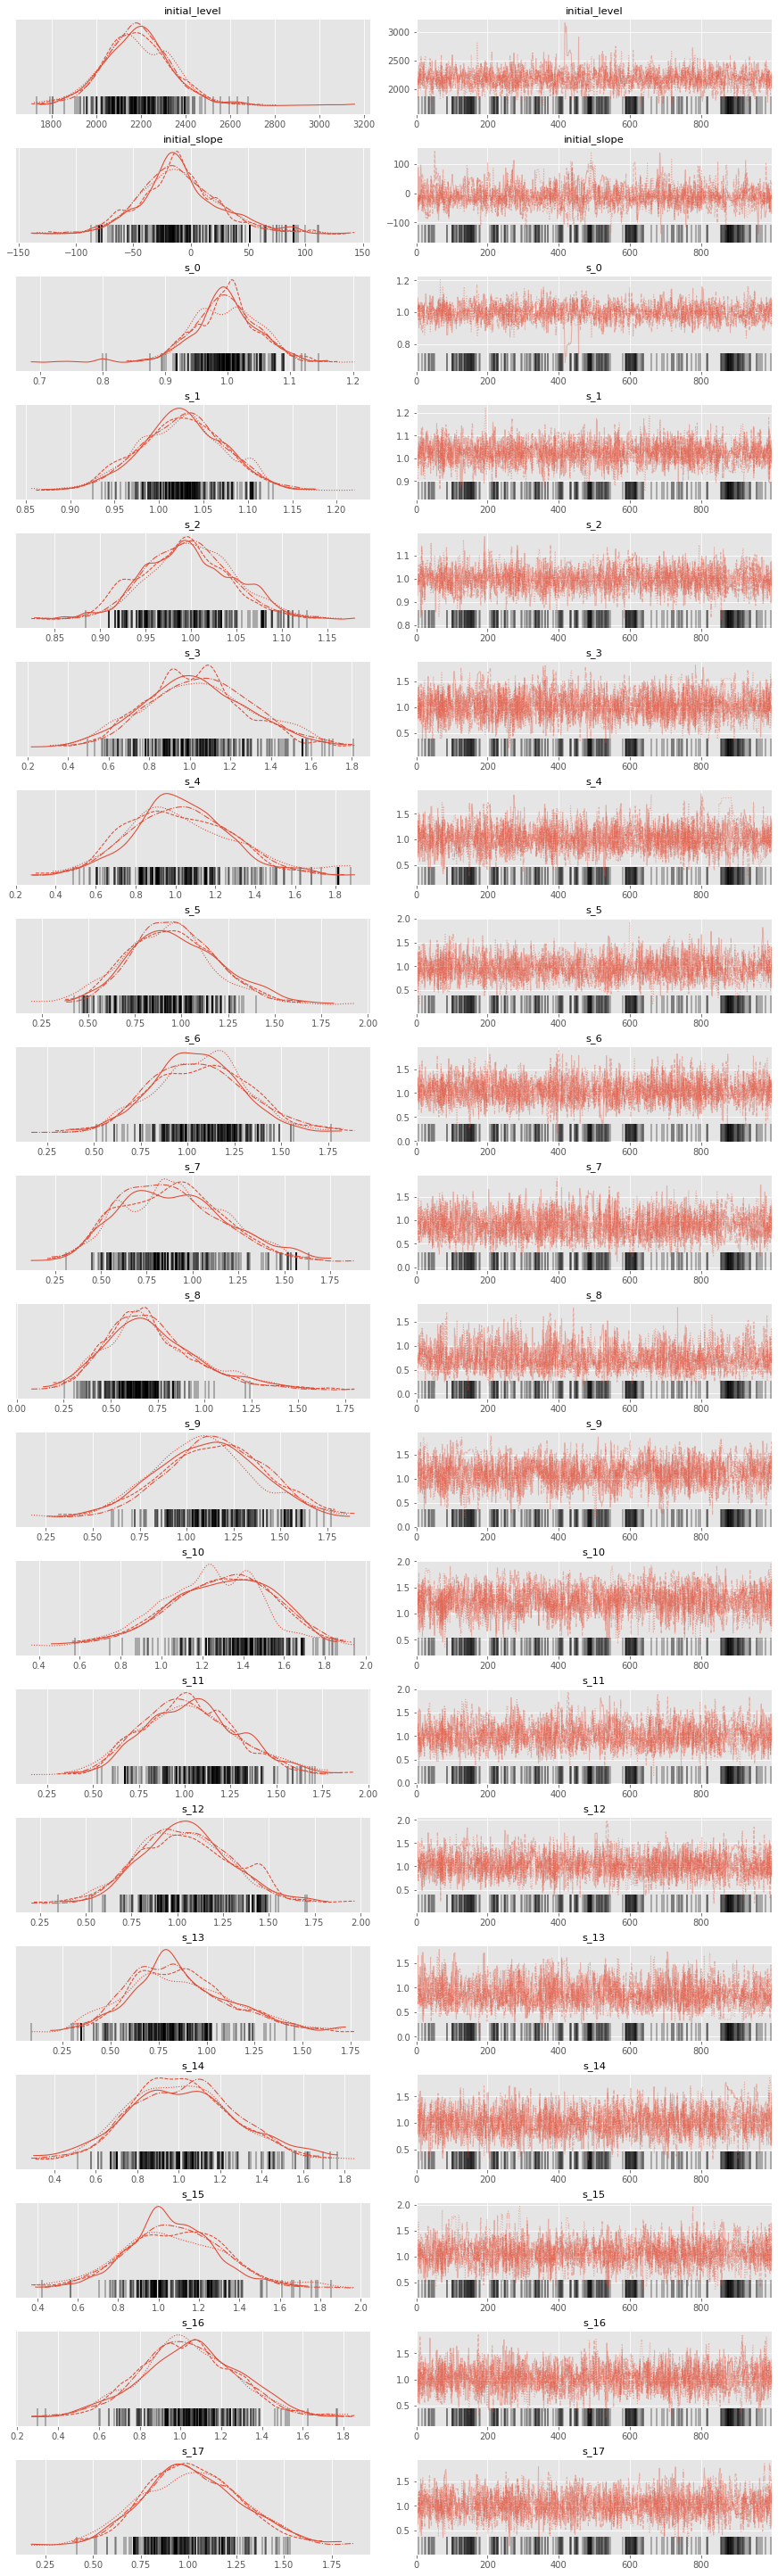

In [429]:
pm.traceplot(hier_trace)

In [353]:
with pm.Model() as hierarchical_model:
    # can make mu the nat'l avg for the zone
    mu_mu = pm.Normal('mu_mu', mu=dd.natl_holiday_factor.mean(), sigma=1)
    sigma_mu = pm.HalfCauchy('sigma_mu', beta=0.5)
    
#     mu_sigma = pm.HalfCauchy('mu_sigma', beta=0.1)
#     sigma_sigma = pm.HalfCauchy('sigma_sigma', beta=0.05)
    
    # mean for each zone, normally distributed around group mean mu_mu
    mu = pm.Normal('mu', mu=mu_mu, sigma=sigma_mu, shape=len(dd.zone_id.unique()))
    # variation/sigma for each zone, HalfCauchy-distributed (avg within-zone variation) 
    sigma = pm.HalfCauchy('sigma', beta=0.1, shape=len(dd.zone_id.unique()))
    
    # error
    
    # expected value
    
    # data likelihood
    # draw from zone dist
    
    y_like = pm.Normal('y_like', mu=mu[zone_idx], sigma=sigma[zone_idx], observed=dd.zone_level_holiday_factor)
    

In [354]:
mu

mu ~ Normal